In [1]:
using Distributions
function PowerLog(p1::Float64,p2::Float64; alpha = 0.05, rsq = 0)
    pd = p2 - p1
    l1 = p1/(1-p1)
    l2 = p2/(1-p2)
    θ = l2 / l1
    or = θ
    λ = log(θ)
    λ2 = λ^2
    za = quantile(Normal(),1-alpha)
    println("One-tailed test: alpha = ",alpha,", p1 = ",p1,", p2 = ",p2,", rsq = ",rsq,", odds ratio = ",or)
    δ = (1 + (1 + λ2)*exp(5 * λ2/4))/(1 + exp(-1*λ2/4))
    pwr = zeros(Float64,8)
    nn = zeros(Int64,8)

    i = 1
    for power = 0.6:.05:.95
        zb = quantile(Normal(),power)

        N = ((za + zb*exp(-1 * λ2/4))^2 * (1 + 2*p1*δ))/(p1*λ2)
        N /= (1 - rsq)
        pwr[i] = power
        nn[i] = ceil(Int64,N)
        i += 1
    end
    return(pwr,nn)
end

PowerLog (generic function with 1 method)

In [2]:
pwr, nn = PowerLog(.25,.40)

One-tailed test: alpha = 0.05, p1 = 0.25, p2 = 0.4, rsq = 0, odds ratio = 2.0000000000000004


([0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95], [58, 66, 74, 83, 95, 109, 128, 159])

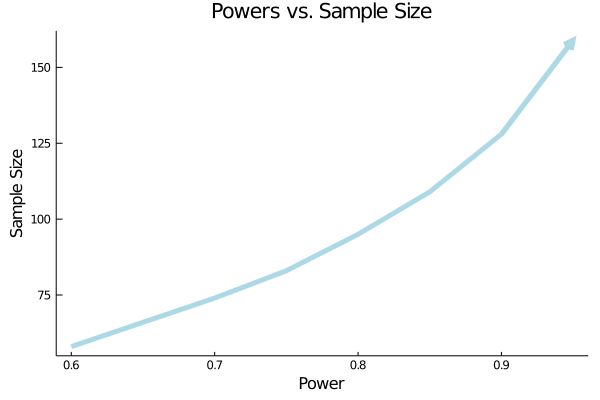

In [22]:
using Plots
plot(pwr,nn,grid = false, arrow = true, linewidth=5,color=:lightblue,
title = "Powers vs. Sample Size",xlabel = "Power", ylabel = "Sample Size", legend = false)

In [116]:
for (i,w) in zip(pwr,nn)
    println("Power: ", i, "   n: ", w)
end

Power: 0.6   n: 95
Power: 0.65   n: 109
Power: 0.7   n: 123
Power: 0.75   n: 140
Power: 0.8   n: 161
Power: 0.85   n: 186
Power: 0.9   n: 221
Power: 0.95   n: 277


In [9]:
using Hone
function _arrayscatter(x,y,shape=Circle(.5,.5,.04),axiscolor=:lightblue,debug=false, grid=Grid(4), custom="")
   topx = maximum(x)
    topy = maximum(y)
    axisx = Line([(-1,-1), (-1,1), (1,1)],axiscolor)
   axisx_tag = axisx.update([(-1,-1), (-1,1), (1,1)])
    axisy = Line([(0,0), (0,1), (0,1)],axiscolor)
    axisy_tag = axisy.update([(0,0), (0,1), (0,1)])
    grid_tag = grid.update()
    fullcustom = ""
    if custom != ""
        [custom = string(fullcustom, i) for i in custom]
    end
    expression = string("compose(context(),")
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        inputx = i / topx
        inputy = w / topy
        exp = shape.update(inputx,inputy)
        expression = string(expression,string(exp))
    end
    expression = string(expression, "(context(),", axisx_tag,grid_tag,custom, axisy_tag,"),")
    expression = Meta.parse(string(expression,")"))
    if debug == true println(expression) end
    composition = eval(expression)
    show() = composition
    tree() = introspect(composition)
    save(name) = draw(SVG(name), composition);
    (var)->(show;composition;tree;save)
end

_arrayscatter (generic function with 6 methods)

In [10]:
shape = Circle(.5,.5,.05,:red)

"red"


#24 (generic function with 1 method)

In [11]:
using Plots

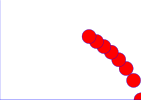

In [14]:
p = Scatter(pwr,nn,shape)
p.show()